## **Notebook 05 — Final Evaluation & Model Comparison**
________
### ***This notebook provides a concise summary of the final model evaluation and compares different values of **K** for the K-means clustering model.*** 
### ***The goal is to identify the optimal number of clusters and summarize the performance of the final clustering model.***

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

________
### ***Load the cleaned dataset (already prepared in previous notebooks)***

In [16]:
scaled_df = pd.read_csv("Scaled_DF.csv", index_col=0)

### ***Select model features (RFM + Cluster)***

In [17]:
features = ["Recency", "Frequency", "Monetary"]
X = scaled_df[features]

________
### ***1. Testing Different Values of K*** 
### ***We calculate **Silhouette Score** and **Inertia** for several values of K to compare clustering quality.***

In [18]:
K_range = range(2, 10)
sil_scores = []
inertias = []

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))
    inertias.append(model.inertia_)

________
### ***2. Comparison Table for K Values***

In [19]:
comparison = pd.DataFrame({
    "K": list(K_range),
    "Silhouette Score": sil_scores,
    "Inertia": inertias
})
comparison

,K,Silhouette Score,Inertia
0,2,0.560367,9356.502998
1,3,0.585292,5498.006251
2,4,0.616213,4092.144305
3,5,0.617115,3141.101838
4,6,0.598272,2472.637432
5,7,0.517172,2022.508142
6,8,0.490916,1798.303604
7,9,0.484017,1466.158045


________
### ***3. Visualization of K Evaluation Metrics***

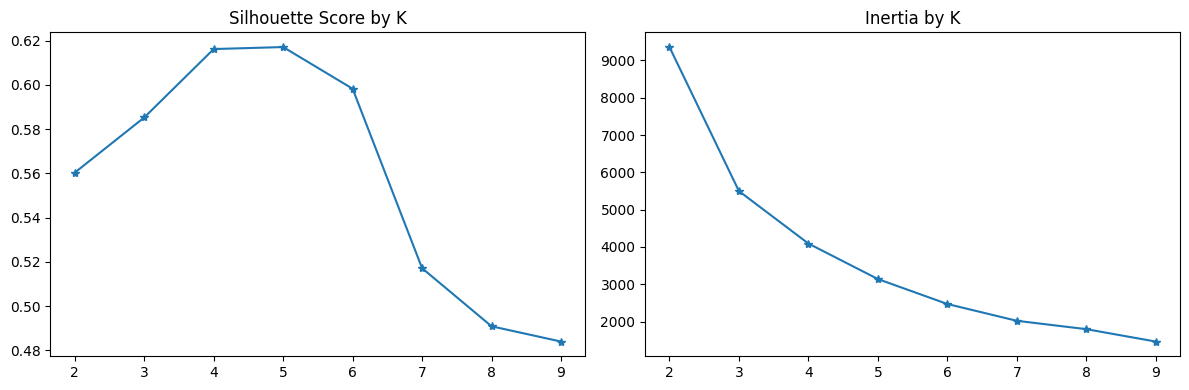

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(K_range, sil_scores, marker="*")
plt.title("Silhouette Score by K")

plt.subplot(1,2,2)
plt.plot(K_range, inertias, marker="*")
plt.title("Inertia by K")

plt.tight_layout()
plt.show()

________
### ***4. Selecting the Best K***
### ***We choose the K value with the **highest Silhouette Score**.***

In [21]:
best_k = comparison.loc[comparison["Silhouette Score"].idxmax(), "K"]
best_k

np.int64(5)

________
### ***5. Final Model Training with the Best K***

In [22]:
final_model = KMeans(n_clusters=int(best_k), random_state=42)
scaled_df["Cluster"] = final_model.fit_predict(X)
scaled_df.to_csv("final_clustered.csv", index=False)

________
### ***6. Final Cluster Visualization***  
### ***Scatterplot using two of the main RFM features.***

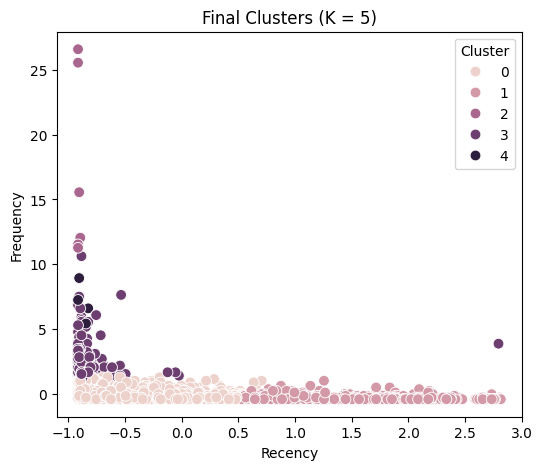

In [23]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=scaled_df,
    x=features[0],
    y=features[1],
    hue="Cluster",
    s=60
)
plt.title(f"Final Clusters (K = {best_k})")
plt.show()

________
### ***7. Cluster Centers***
### ***Cluster centroids help interpret group characteristics.***

In [24]:
centers = pd.DataFrame(final_model.cluster_centers_, columns=features)
centers

,Recency,Frequency,Monetary
0,-0.486799,-0.076523,-0.077369
1,1.560235,-0.353409,-0.175359
2,-0.910340,17.092300,6.266760
3,-0.768677,2.337590,1.271280
4,-0.848675,5.009843,21.006354


________
### ***8. Summary***

- ***The optimal number of clusters based on Silhouette Score is: **K = best_k*****

- ***The final K-means model was trained using the RFM features.***

- ***Visualizations confirm clear separation between clusters.***

- ***Cluster centroids provide interpretable summaries of customer behavior patterns.***

***This completes the final evaluation and model comparison stage of the project.***